In [24]:
!pip install keras
!pip install tensorflow

import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import re
import itertools
import seaborn as sns
import nltk, os, re, string
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import string,unicodedata
from tensorflow.keras.preprocessing import text, sequence
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Fake.csv')

df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df_fake=df.drop(['subject','date'],axis=1)

In [6]:
df_fake.head()

,title,text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...


In [7]:
df_fake.text.shape

(23481,)

In [8]:
df_fake['label'] ='FAKE'

In [9]:
df_fake.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,FAKE


In [10]:
df_true = pd.read_csv('/content/drive/MyDrive/True.csv')

In [11]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [12]:
df_true=df_true.drop(['subject','date'],axis=1)

In [13]:
df_true.head()

,title,text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...


In [14]:
df_true['label']='TRUE'
df_true.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,TRUE


In [15]:
data_train = pd.concat([df_true, df_fake], ignore_index=True)
data_train.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,TRUE


In [16]:
data_train.shape

(44898, 3)

In [17]:
data_train.to_csv('fake_news.csv')

In [34]:
df = pd.read_csv('/content/fake_news.csv')
df.head()

,Unnamed: 0,title,text,label
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,TRUE
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,TRUE
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,TRUE
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,TRUE
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,TRUE


In [35]:
df.isnull().sum()

,0
Unnamed: 0,0
title,0
text,0
label,0


In [36]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [37]:
df.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,TRUE


In [38]:
!pip install nltk
import nltk
import string

nltk.download('stopwords') # downloads the stopwords resource
nltk.download('punkt') # downloads the punkt resource

## TOTAL NUMBER OF WORDS USED
df['no. of words'] = df.title.apply(lambda x: len(x.split()))

## TOTAL NUMBER OF UNIQUE WORDS USED
df['no. of unique words'] = df.title.apply(lambda x: len(set(x.split())))

## TOTAL NUMBER OF CHARACTERS USED
df['no. of char'] = df.title.apply(lambda x: len(x))

## TOTAL SPECIAL CHARACTERS USED
df["no. of special"] = df.apply(lambda p: sum( not q.isalpha() for q in p["title"] ), axis=1)

## TOTAL NUMBER OF PUNCTUATION USED
def punct(text):
    return(len([w for w in text.split() if w in list(string.punctuation)]))
df['no. of punct'] = df.title.apply(lambda x: punct(x))

## TOTAL NUMBER OF STOPWORDS USED
from nltk.corpus import stopwords # imports the stopwords module

stopword = stopwords.words('english')
def stop(text):
    return(len([w for w in text.split() if w in stopword]))
df['no. of stopwords'] = df.title.apply(lambda x: stop(x))

## TOTAL NUMBER OF TITLE WORDS USED
def title(text):
    return(len([w for w in text.split() if w.istitle()]))
df['no. of title_case'] = df.title.apply(lambda x: title(x))

## TOTAL NUMBER OF UPPERCASE WORDS USED
def upper(text):
    return(len([w for w in text.split() if w.isupper()]))
df['no. of title_case'] = df.title.apply(lambda x: upper(x))

## NUMBER OF MOST FREQUENT TERMS
token = nltk.word_tokenize(''.join(df.title))
frequent = nltk.FreqDist(token)

## REMOVING PUNCTUATION AND STOPWORDS FROM MOST FREQUENT WORDS
for sym in string.punctuation:
    del frequent[sym]
for word in stopword:
    del frequent[word]

frequent.most_common(15)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('’', 13531),
 ('Trump', 10277),
 ('To', 7566),
 ('”', 5470),
 ('VIDEO', 5336),
 ('“', 5028),
 ('The', 4570),
 ("'s", 4151),
 ('For', 3963),
 ('In', 3533),
 ('Of', 3441),
 ('‘', 3438),
 ('A', 3089),
 ('Video', 2993),
 ('On', 2885)]

In [39]:
## NUMBER OF WORDS CONTAIN OUT OF MOST COMMON 100 WORDS
freq_words = list(dict(frequent.most_common()[:100]).keys())
def freq(text):
    return(len([w for w in text.split() if w in freq_words]))
df['no. of freq words'] = df.title.apply(lambda x: freq(x))

In [40]:
df.head()

,title,text,label,no. of words,no. of unique words,no. of char,no. of special,no. of punct,no. of stopwords,no. of title_case,no. of freq words
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,TRUE,10,10,64,12,0,1,1,3
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,TRUE,9,9,64,11,0,2,1,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,TRUE,10,10,60,15,0,2,1,2
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,TRUE,9,9,59,10,0,1,2,2
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,TRUE,11,11,69,12,0,2,0,1


In [41]:
## AVERAGE OF FREQ WORDS WITH TOTAL WORDS USED
freq_words = list(dict(frequent.most_common()[:100]).keys())
def freq(text):
    return(len([w for w in text.split() if w in freq_words])/len(text.split()))
df['avg freq words']= df.title.apply(lambda x: freq(x))

In [42]:
df.head()

,title,text,label,no. of words,no. of unique words,no. of char,no. of special,no. of punct,no. of stopwords,no. of title_case,no. of freq words,avg freq words
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,TRUE,10,10,64,12,0,1,1,3,0.300000
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,TRUE,9,9,64,11,0,2,1,1,0.111111
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,TRUE,10,10,60,15,0,2,1,2,0.200000
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,TRUE,9,9,59,10,0,1,2,2,0.222222
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,TRUE,11,11,69,12,0,2,0,1,0.090909


<ipython-input-47-e63077b026bb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df.label, palette='Set1')


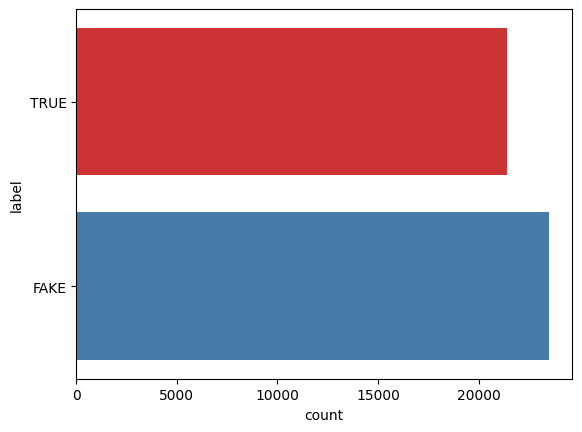

In [47]:
sns.countplot(df.label, palette='Set1')
plt.show()


In [48]:
df_fake = df[df['label']=='FAKE']
df_true = df[df['label']=='TRUE']

<Axes: ylabel='Frequency'>

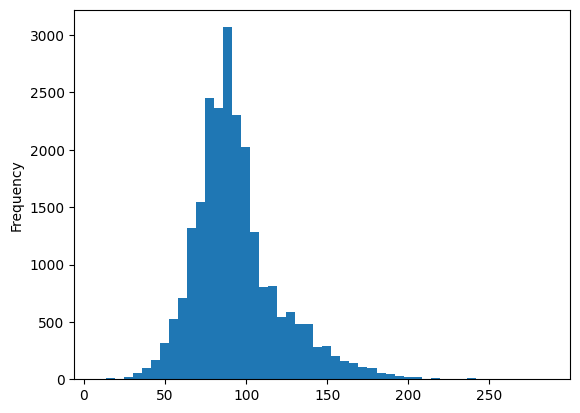

In [50]:
df_fake['no. of char'].plot(bins=50, kind='hist')

In [51]:
df_fake['no. of char'].describe()

,no. of char
count,23481.000000
mean,94.198032
std,27.184433
min,8.000000
25%,77.000000
50%,90.000000
75%,105.000000
max,286.000000


<Axes: ylabel='Frequency'>

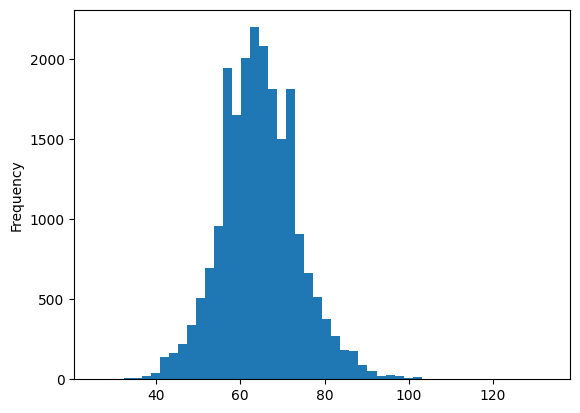

In [52]:
df_true['no. of char'].plot(bins=50, kind='hist')

In [53]:
df_true['no. of char'].describe()

,no. of char
count,21417.000000
mean,64.667881
std,9.168999
min,26.000000
25%,59.000000
50%,64.000000
75%,70.000000
max,133.000000


<Axes: ylabel='Frequency'>

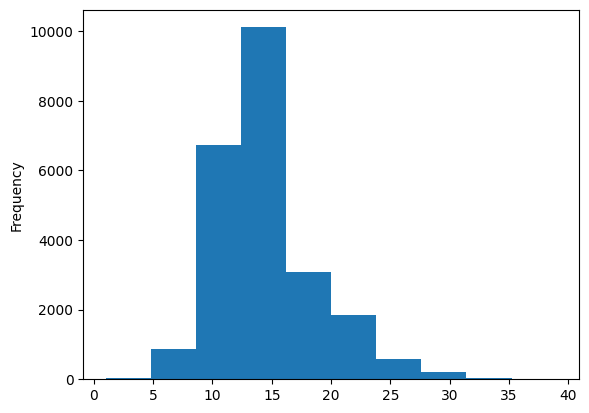

In [54]:
df_fake['no. of unique words'].plot(bins=10, kind='hist')

In [55]:
df_fake['no. of unique words'].describe()

,no. of unique words
count,23481.000000
mean,14.490609
std,4.129960
min,1.000000
25%,12.000000
50%,14.000000
75%,16.000000
max,39.000000


<Axes: ylabel='Frequency'>

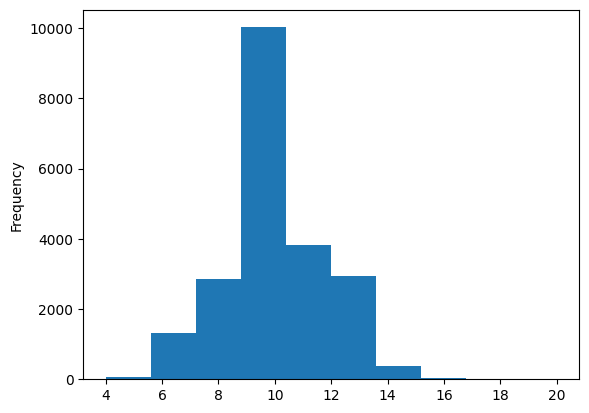

In [56]:
df_true['no. of unique words'].plot(bins=10, kind='hist')

In [57]:
df_true['no. of unique words'].describe()

,no. of unique words
count,21417.000000
mean,9.876827
std,1.656130
min,4.000000
25%,9.000000
50%,10.000000
75%,11.000000
max,20.000000


<ipython-input-58-b23ebb90b21a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_fake['no. of words'])


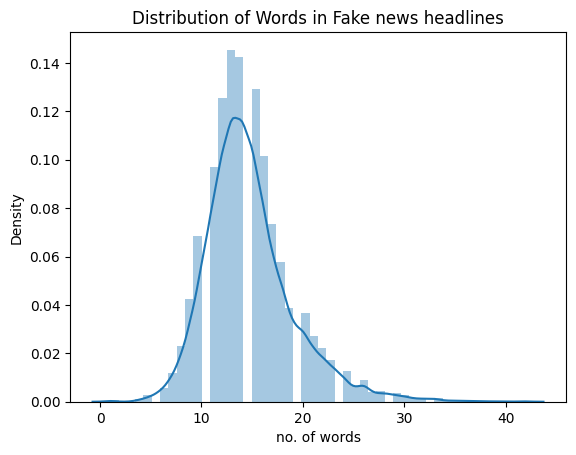

In [58]:
# distribution of fake words in Headline
sns.distplot(df_fake['no. of words'])
plt.title("Distribution of Words in Fake news headlines")
plt.show()

<ipython-input-59-0d664df4c214>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_true['no. of words'])


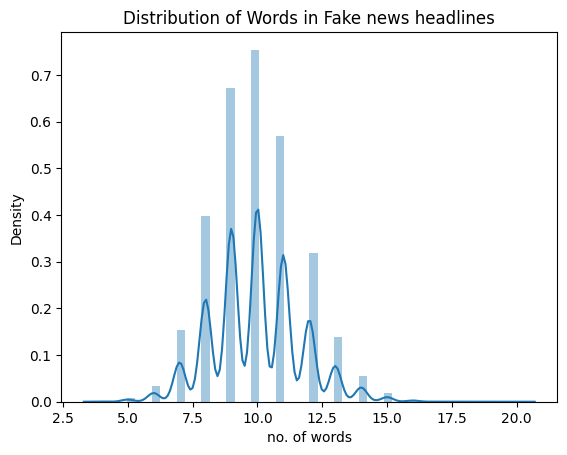

In [59]:
# distribution of true words in Headline
sns.distplot(df_true['no. of words'])
plt.title("Distribution of Words in Fake news headlines")
plt.show()

In [60]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

# Removing stop words which are unneccesary from headline news
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

df['title']=df['title'].apply(remove_stopwords)

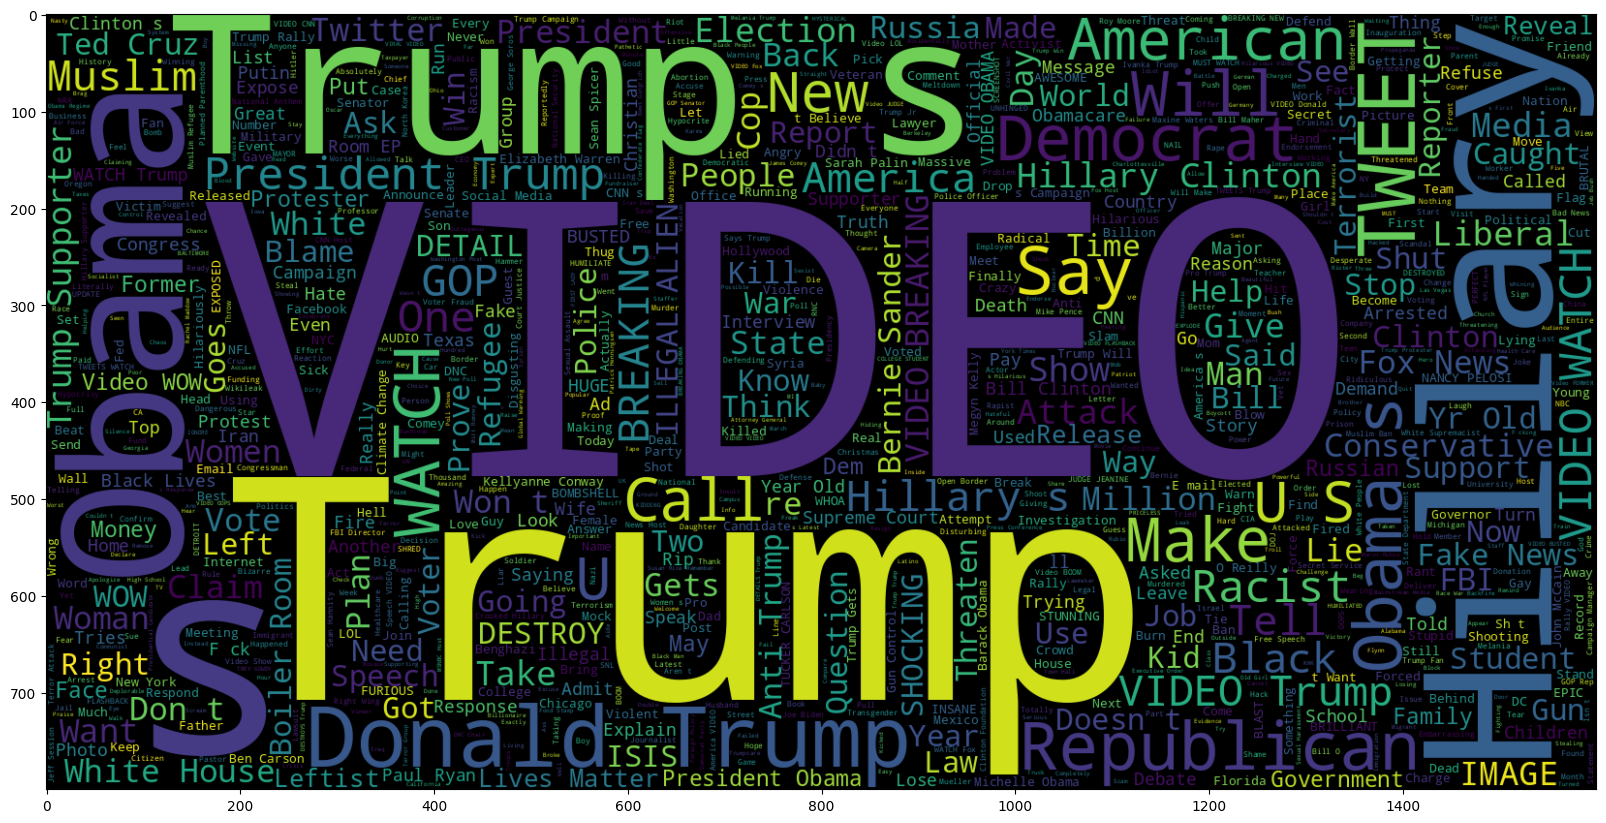

In [61]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(df_fake.title))
plt.imshow(wc , interpolation = 'bilinear')

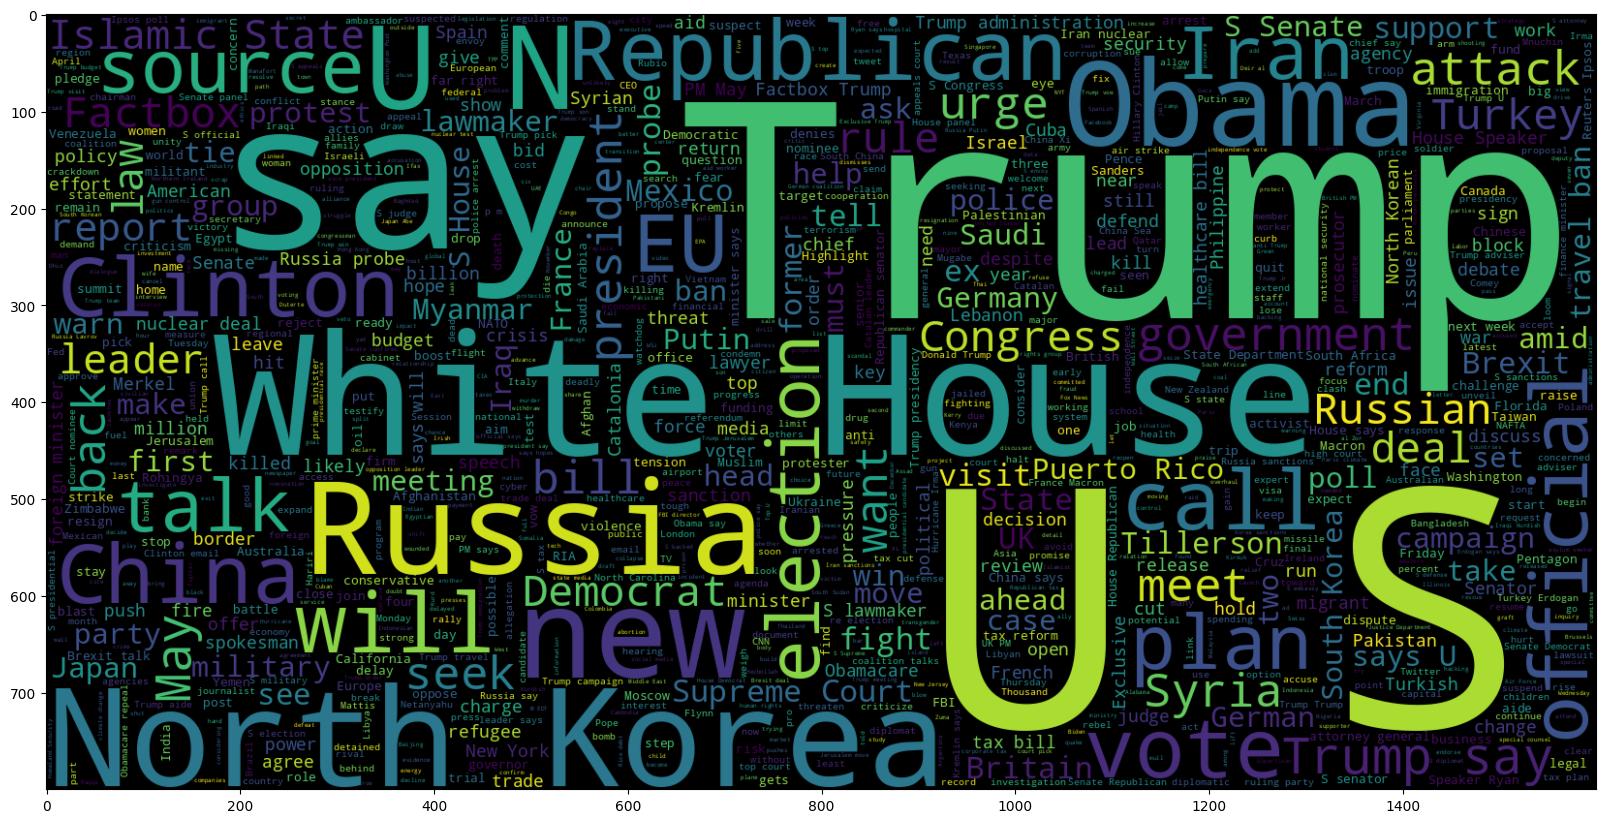

In [62]:
plt.figure(figsize = (20,20)) # Text that is True News Headlines
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(df_true.title))
plt.imshow(wc , interpolation = 'bilinear')

In [63]:
# removing news source info from text
def extract_txt(text):
    regex = re.search(r"(?<=\(Reuters\)\s\-\s).*",text)
    if regex:
        return regex.group(0)
    return text
df['text_processed'] = df['text'].apply(extract_txt)

In [64]:
df["label"] = df.label.apply(lambda  x:0 if x=='TRUE' else 1)
df.head()

,title,text,label,no. of words,no. of unique words,no. of char,no. of special,no. of punct,no. of stopwords,no. of title_case,no. of freq words,avg freq words,text_processed
0,"U.S. budget fight looms, Republicans flip fisc...",WASHINGTON (Reuters) - The head of a conservat...,0,10,10,64,12,0,1,1,3,0.300000,The head of a conservative Republican faction ...
1,U.S. military accept transgender recruits Mond...,WASHINGTON (Reuters) - Transgender people will...,0,9,9,64,11,0,2,1,1,0.111111,Transgender people will be allowed for the fir...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0,10,10,60,15,0,2,1,2,0.200000,The special counsel investigation of links bet...
3,FBI Russia probe helped Australian diplomat ti...,WASHINGTON (Reuters) - Trump campaign adviser ...,0,9,9,59,10,0,1,2,2,0.222222,Trump campaign adviser George Papadopoulos tol...
4,Trump wants Postal Service charge 'much more' ...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0,11,11,69,12,0,2,0,1,0.090909,President Donald Trump called on the U.S. Post...


In [65]:
#combining text_processed and title for creating full news article with headline
df['final_news'] = df['title'] + " " + df['text_processed']
df.head()

,title,text,label,no. of words,no. of unique words,no. of char,no. of special,no. of punct,no. of stopwords,no. of title_case,no. of freq words,avg freq words,text_processed,final_news
0,"U.S. budget fight looms, Republicans flip fisc...",WASHINGTON (Reuters) - The head of a conservat...,0,10,10,64,12,0,1,1,3,0.300000,The head of a conservative Republican faction ...,"U.S. budget fight looms, Republicans flip fisc..."
1,U.S. military accept transgender recruits Mond...,WASHINGTON (Reuters) - Transgender people will...,0,9,9,64,11,0,2,1,1,0.111111,Transgender people will be allowed for the fir...,U.S. military accept transgender recruits Mond...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0,10,10,60,15,0,2,1,2,0.200000,The special counsel investigation of links bet...,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped Australian diplomat ti...,WASHINGTON (Reuters) - Trump campaign adviser ...,0,9,9,59,10,0,1,2,2,0.222222,Trump campaign adviser George Papadopoulos tol...,FBI Russia probe helped Australian diplomat ti...
4,Trump wants Postal Service charge 'much more' ...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0,11,11,69,12,0,2,0,1,0.090909,President Donald Trump called on the U.S. Post...,Trump wants Postal Service charge 'much more' ...


In [66]:
# now we can delete extra columns
cols_del =['title','text','text_processed']
df = df.drop(cols_del,axis=1)

df.head()

,label,no. of words,no. of unique words,no. of char,no. of special,no. of punct,no. of stopwords,no. of title_case,no. of freq words,avg freq words,final_news
0,0,10,10,64,12,0,1,1,3,0.300000,"U.S. budget fight looms, Republicans flip fisc..."
1,0,9,9,64,11,0,2,1,1,0.111111,U.S. military accept transgender recruits Mond...
2,0,10,10,60,15,0,2,1,2,0.200000,Senior U.S. Republican senator: 'Let Mr. Muell...
3,0,9,9,59,10,0,1,2,2,0.222222,FBI Russia probe helped Australian diplomat ti...
4,0,11,11,69,12,0,2,0,1,0.090909,Trump wants Postal Service charge 'much more' ...


In [67]:
#creating list of possible stopwords from nltk library
stop = stopwords.words('english')

def cleanText(txt):
  # lowercaing
    txt = txt.lower()
  # removing stopwords
    txt = ' '.join([word for word in txt.split() if word not in (stop)])
  # removing non-alphabetic characters
    txt = re.sub('[^a-z]',' ',txt)
    return txt

In [68]:
#applying text cleaning function to clean final_news
df['final_news'] = df['final_news'].apply(cleanText)
df.head()

,label,no. of words,no. of unique words,no. of char,no. of special,no. of punct,no. of stopwords,no. of title_case,no. of freq words,avg freq words,final_news
0,0,10,10,64,12,0,1,1,3,0.300000,u s budget fight looms republicans flip fisc...
1,0,9,9,64,11,0,2,1,1,0.111111,u s military accept transgender recruits mond...
2,0,10,10,60,15,0,2,1,2,0.200000,senior u s republican senator let mr muell...
3,0,9,9,59,10,0,1,2,2,0.222222,fbi russia probe helped australian diplomat ti...
4,0,11,11,69,12,0,2,0,1,0.090909,trump wants postal service charge much more ...


In [69]:
path = '/content/drive/MyDrive'

EMBEDDING_FILE=f'{path}/glove.6B.50d.txt'

# configuration setting
MAX_SEQUENCE_LENGTH = 100
MAX_VOCAB_SIZE = 20000
EMBEDDING_DIM = 50
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 32
EPOCHS = 10

In [74]:
!wget http://nlp.stanford.edu/data/glove.6B.zip # removed shell and used ! to run shell commands
!unzip glove*.zip

--2024-09-12 04:02:46--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-09-12 04:02:46--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-09-12 04:02:46--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [70]:
y = df['label'].values
X = df.drop(['label'],axis=1)

In [71]:
y.shape

(44898,)

In [76]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip
!mv glove.6B.50d.txt /content/drive/MyDrive # move the unzipped file to the correct location

--2024-09-12 05:07:00--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-09-12 05:07:00--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-09-12 05:07:00--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

In [77]:
# load in pre-trained word vectors
print('Loading word vectors...')
word2vec = {}
with open(EMBEDDING_FILE) as f:
  # is just a space-separated text file in the format:
  # word vec[0] vec[1] vec[2] ...
  for line in f:
    values = line.split()
    word = values[0]
    vec = np.asarray(values[1:], dtype='float32')
    word2vec[word] = vec
print('Found %s word vectors.' % len(word2vec))

Loading word vectors...
Found 400000 word vectors.


In [79]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Dense, Embedding, Input,LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [80]:
# convert the sentences (strings) into integers
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(list(X['final_news']))
X = tokenizer.texts_to_sequences(list(X['final_news']))

# pad sequences so that we get a N x T matrix
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (44898, 100)


In [81]:
# get word -> integer mapping
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Found 115831 unique tokens.


In [82]:
# prepare embedding matrix
print('Filling pre-trained embeddings...')
num_words = min(MAX_VOCAB_SIZE, len(word2idx) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word2idx.items():
  if i < MAX_VOCAB_SIZE:
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
      # words not found in embedding index will be all zeros.
      embedding_matrix[i] = embedding_vector

Filling pre-trained embeddings...


In [83]:
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(
  num_words,
  EMBEDDING_DIM,
  weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [84]:
print('Building model...')

# create an LSTM network with a single LSTM
input_ = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedding_layer(input_)
# x = LSTM(15, return_sequences=True)(x)
x = Bidirectional(LSTM(15, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(input_, output)
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
model.summary()

Building model...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 100, 50)             │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 100, 30)             │           7,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 30)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,007,951 (3.85 MB)

 Trainable params: 7,951 (31.06 KB)

 Non-trainable params: 1,000,000 (3.81 MB)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,stratify=y, random_state=0)

In [86]:
print('Training model...')
r = model.fit(
  X_train,
  y_train,
  batch_size=BATCH_SIZE,
  epochs=EPOCHS,
  validation_split=VALIDATION_SPLIT
)

Training model...
Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 137s 143ms/step - accuracy: 0.8681 - loss: 0.3351 - val_accuracy: 0.9431 - val_loss: 0.1459
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 93s 89ms/step - accuracy: 0.9443 - loss: 0.1472 - val_accuracy: 0.9601 - val_loss: 0.1098
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 87s 96ms/step - accuracy: 0.9613 - loss: 0.1038 - val_accuracy: 0.9658 - val_loss: 0.0925
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 144s 99ms/step - accuracy: 0.9700 - loss: 0.0834 - val_accuracy: 0.9744 - val_loss: 0.0727
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 137s 93ms/step - accuracy: 0.9779 - loss: 0.0628 - val_accuracy: 0.9780 - val_loss: 0.0643
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.9815 - loss: 0.0530 - val_accuracy: 0.9793 - val_loss: 0.0555
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.9826 - loss: 0.0483 - val_accuracy: 0.9812 - val_loss: 0.0524
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 86s 95ms/step - accuracy: 0.

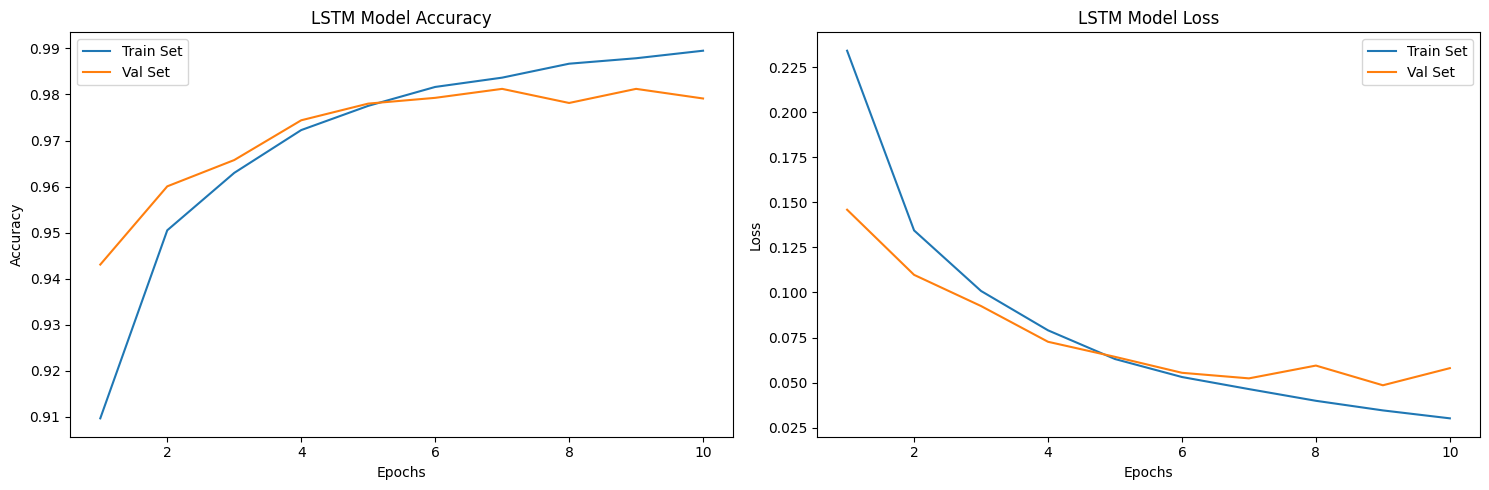

In [87]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']
epochs_range = range(1, len(r.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Model Loss')

plt.tight_layout()
plt.show()

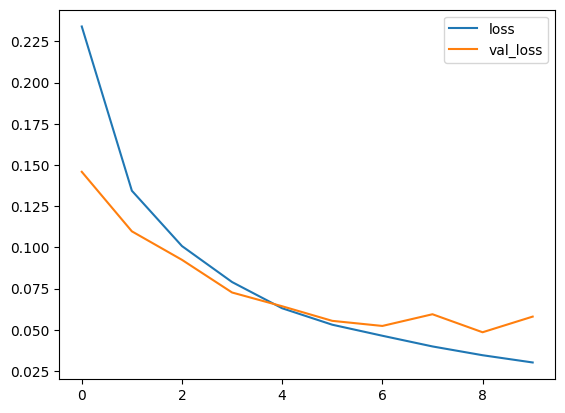

In [88]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

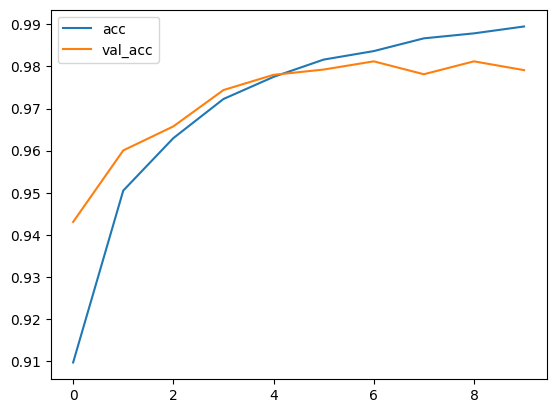

In [89]:
# Plotting accuracies
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [90]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100)

1123/1123 ━━━━━━━━━━━━━━━━━━━━ 23s 21ms/step - accuracy: 0.9904 - loss: 0.0292
Accuracy of the model on Training Data is -  98.83623719215393
281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.9824 - loss: 0.0508
Accuracy of the model on Testing Data is -  98.0512261390686


In [94]:
pred = model.predict(X_test)
pred[:5]

281/281 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step


array([[0.9999955 ],
       [0.0100201 ],
       [0.99995124],
       [0.9997706 ],
       [0.99999505]], dtype=float32)

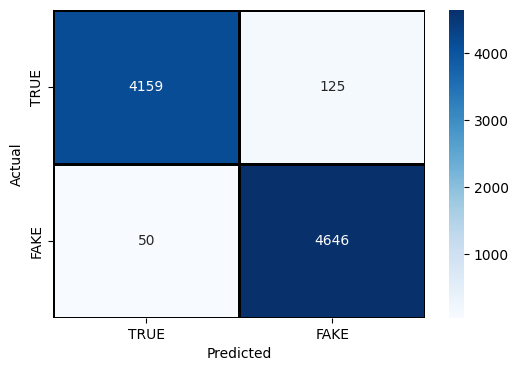

In [95]:
cm = confusion_matrix(y_test,pred.round())
cm = pd.DataFrame(cm , index = ['TRUE','FAKE'] , columns = ['TRUE','FAKE'])
plt.figure(figsize = (6,4))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['TRUE','FAKE'] , yticklabels = ['TRUE','FAKE'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [96]:
print(classification_report(y_test,pred.round()))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4284
           1       0.97      0.99      0.98      4696

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



In [97]:
y_pred = model.predict(X_test).ravel()

281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step


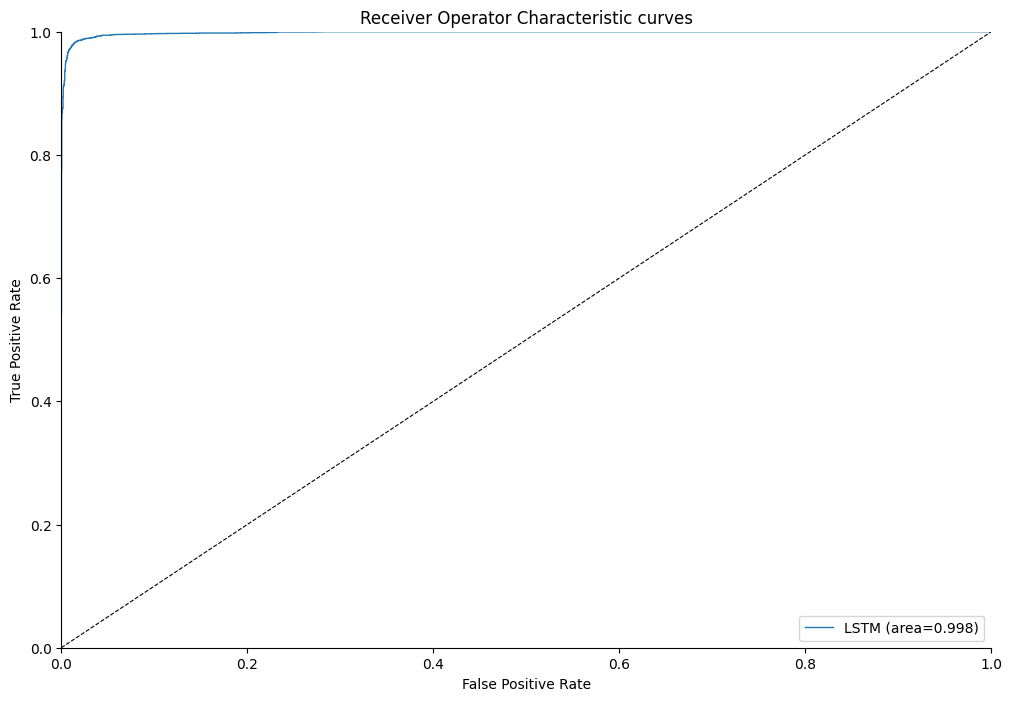

In [98]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba)))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,y_pred,label='LSTM', l='-')



ax.plot([0,1], [0,1], color='k', linewidth=0.8, linestyle='--',
        )
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

In [99]:
testSent =["Trey Gowdy destroys this clueless DHS employee when asking about the due process of getting on the terror watch list. Her response is priceless:  I m sorry, um, there s not a process afforded the citizen prior to getting on the list.  ",
       "Poland s new prime minister faces a difficult balancing act trying to repair bruised relations with the European Union without alienating the eurosceptic government s core voters. A Western-educated former banker who is fluent in German and English and was sworn in on Monday, Mateusz Morawiecki boasts the credentials needed to negotiate with Brussels. But any compromises to improve relations with Brussels, which sees the ruling Law and Justice (PiS) party as a threat to democracy, would risk upsetting the traditional, Catholic supporters who propelled it into power two years ago. It is a gamble that could backfire, and it is not yet clear how far Morawiecki, 49, and his party, dominated by former Prime Minister Jaroslaw Kaczynski, are ready to go to please Brussels.   The idea to build up international credibility seems rational,  said Jaroslaw Flis, a sociologist at the Jagiellonian University.  But such actions would have to be in complete contrast with what Mateusz Morawiecki would have to do domestically to prevent the PiS from falling apart.  The PiS government has alienated many people at home and abroad with its nationalist rhetoric and changes to state institutions which the EU says subvert the bloc s laws. The European Commission, the EU executive, opened an inquiry into the rule of law in Poland in January 2016 and the European Parliament has started a process that could deprive Poland of its voting rights in the 28-nation bloc. Any hope in Brussels that Morawiecki s appointment signals a change of course by PiS will have been tempered by Polish parliament approving legal changes to the judiciary in defiance of the EU on Friday - the day after his nomination. The changes give parliament, where PiS has a majority, de facto control over the selection of judges. EU leaders looking for clues about Morawiecki s plans will also have taken little comfort from comments he has made since being nominated, making clear he backs a tough line on the EU and believes in PiS s traditional vision of the Polish state.   We want to transform Europe, this is my dream, to re-christianise it,  Morawiecki told the Catholic Radio Maryja broadcaster.  We want Poland to be strong, but also to contain ... Christian values. We will defend them against the background of laicisation and a deepening consumerism.  Asked by the radio interviewer about demands by French President Emmanuel Macron for Poland to face sanctions over a subversion of democratic rules, Morawiecki said he would not  bow down to blackmail.  In comments to parliament on Tuesday, Morawiecki suggested Poland might relent in a conflict with Brussels over logging in an ancient forest, which an EU court has said contravenes EU laws. But he said Poland s national interests came first in any debate over the future of the EU and that he  wholeheartedly  supported PiS s overhaul of the judiciary. Like Beata Szydlo, whom he replaced as prime minister, Morawiecki is likely to have to defer to PiS leader and co-founder Jaroslaw Kaczynski. Prime minister from July 2006 to November 2007, Kaczynski is widely seen as the power behind the party and Poland s main decision-maker. How much scope that will leave Morawiecki to carve out his own path remains to be seen. Former Polish President Lech Walesa, a PiS critic, has suggested that nothing of substance will change.  The circus has stayed the same, only the clowns have changed their roles,  Walesa, who led the Solidarity trade union movement that ended communist rule, said on Twitter.  The appointment of Morawiecki, whose father founded and led a radical offshoot of Solidarity in the 1980s, appears designed in part to present a new face of Poland to the EU. Szydlo, 54, at times responded angrily to EU criticism and relations with the bloc soured under her government. Underlining PiS opposition to Muslim immigration, she said last month Poland wanted to be sure Christian traditions were not subject to  ideological censorship  in the EU. Along with Hungary, Poland has refused to take in any of its quota of the wave of refugees from Syria and elsewhere who have come to Europe since 2015, on the grounds that Muslim immigrants are a threat to national security and stability.         Such comments appeal to core PiS voters, and Szydlo s government, which promised generous welfare payouts and a dedication to traditional Catholic values, was one of Poland s most popular since communist rule ended in 1989. A relative newcomer to politics, Morawiecki lacks Szydlo s broad appeal. But he has overseen significant economic achievements since becoming finance minister in 2016, a position he has retained in the new government. Tusk has welcomed what he sees as signs that Morawiecki is a liberal economist who wants better ties with the EU.  There is no doubt that (Morawiecki s) liberal bias and some pro-western gestures could be a sign that there is a lurking desire to improve relations,  Tusk said last week. But an economic stimulus plan Morawiecki unveiled in 2016 has been criticized by economists who say it depends heavily on private investment, which is low in Poland despite fast economic growth.  What Morawiecki sees as a solution, meaning more political influence in the economy, is actually dangerous,  said Leszek Balcerowicz, a former finance minister who coordinated the transition to a market economy after decades of communist rule. Any hint of protectionism is also likely to worry EU leaders, who seek to break down trade barriers.  Morawiecki has called the privatization of state-owned companies a tragedy and said he will give more power to domestic capital at the expense of foreign investors. In his comments to parliament on Tuesday, he said economic policy should not change.  ",
      ]

In [100]:
def cleanText(txt):
    txt = txt.lower()
    txt = ' '.join([word for word in txt.split() if word not in (stop)])
    txt = re.sub('[^a-z]',' ',txt)
    return txt


In [101]:
def predict_text(lst_text):
    test = tokenizer.texts_to_sequences(lst_text)
    # pad sequences so that we get a N x T matrix
    testX = pad_sequences(test, maxlen=MAX_SEQUENCE_LENGTH)
    df_test = pd.DataFrame(lst_text, columns = ['test_sent'])

    prediction = model.predict(testX)
    df_test['prediction']=prediction
    df_test["test_sent"] = df_test["test_sent"].apply(cleanText)
    df_test['prediction']=df_test['prediction'].apply(lambda x: "Fake" if x>=0.5 else "Real")
    return df_test

In [102]:
df_testsent = predict_text(testSent)
df_testsent

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


,test_sent,prediction
0,trey gowdy destroys clueless dhs employee aski...,Fake
1,poland new prime minister faces difficult bala...,Real
